# Explore here

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [10]:
base_url = "https://raw.githubusercontent.com/4GeeksAcademy/Finarosalina_diabetes_machine-learning-py-template/main/data/processed/"

X_train2 = pd.read_csv(base_url + "X_train2.csv")
X_test2 = pd.read_csv(base_url + "X_test2.csv")
y_train2 = pd.read_csv(base_url + "y_train2.csv")
y_test2 = pd.read_csv(base_url + "y_test2.csv")


In [9]:
X_train2.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9,102,76,0,32.9,0.665,46
1,6,87,80,0,23.2,0.084,32
2,8,65,72,0,32.0,0.600,42
3,0,86,68,0,35.8,0.238,25
4,12,88,74,54,35.3,0.378,48


In [8]:
X_test2.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,144,58,140,29.5,0.287,37
1,1,79,80,37,25.4,0.583,22
2,6,108,44,130,24.0,0.813,35
3,3,102,44,94,30.8,0.400,26
4,7,81,78,48,46.7,0.261,42


In [5]:


X_test2.head()
X_test2.shape

(129, 7)

In [11]:
X_train2.to_csv("/workspaces/Finarosalina_Random_Forest_/data/processed/X_train2.csv", index=False)
X_test2.to_csv("/workspaces/Finarosalina_Random_Forest_/data/processed/X_test2.csv", index=False)
y_train2.to_csv("/workspaces/Finarosalina_Random_Forest_/data/processed/y_train2.csv", index=False)
y_test2.to_csv("/workspaces/Finarosalina_Random_Forest_/data/processed/y_test2.csv", index=False)


In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train2, y_train2)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=150)

In [39]:
y_pred = model.predict(X_test2)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test2, y_pred)

0.8217054263565892

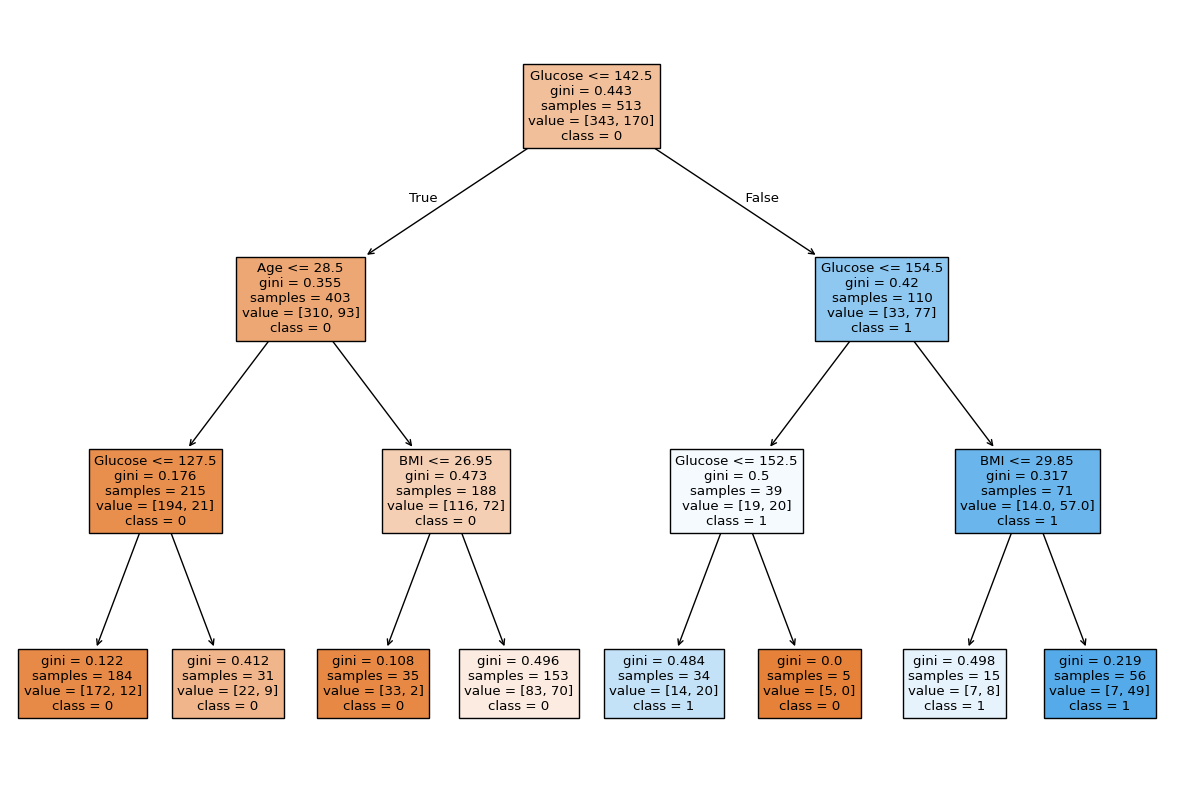

In [41]:
from sklearn.tree import DecisionTreeClassifier

simple_features = ["Glucose", "BMI", "Age"]  # para poder visualizarlo, lo pinto sólo con 3 variables
X_simple = X_train2[simple_features]


simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_simple, y_train2)

plt.figure(figsize=(15, 10))
tree.plot_tree(simple_tree,
               feature_names=simple_features,
               class_names=["0", "1"],
               filled=True)
plt.show()


In [42]:
from pickle import dump
model_filename = "/workspaces/Finarosalina_Random_Forest_/models/random_forest_classifier_default_42.sav"
dump(model, open(model_filename, "wb"))

print(f"Modelo guardado exitosamente en: {model_filename}")


Modelo guardado exitosamente en: /workspaces/Finarosalina_Random_Forest_/models/random_forest_classifier_default_42.sav


In [43]:
import json

# Ruta del archivo .ipynb
notebook_path = "/workspaces/Finarosalina_Random_Forest_/src/explore.ipynb"

# Leer el archivo .ipynb como JSON
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = json.load(f)

# Extraer el código de las celdas tipo "code"
code_cells = []
for cell in notebook.get('cells', []):
    if cell.get('cell_type') == 'code':
        code = ''.join(cell.get('source', []))
        code_cells.append(code)

# Ruta del archivo .py donde se guardará el código
output_path = "/workspaces/Finarosalina_Random_Forest_/src/app.py"

# Combinar el código y escribirlo en el archivo .py
with open(output_path, 'w', encoding='utf-8') as f:
    f.write("# Código extraído desde explore.ipynb\n\n")
    f.write("\n\n".join(code_cells))

